## Zero Crossings in Audio
### Chris Tralie

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In most natural audio that we record, there are a range of frequencies that occur at different times.  One simple way to estimate instantaneous frequency is to count the number of zero crossings over an interval.  Let's say we have the following "linear chirp" (named as such since the perceived frequency, the derivative of the inside of the cosine, increases linearly)

In [2]:
sr = 8000
t = np.arange(sr*2)/sr
y = np.cos(2*np.pi*220*t**2)
ipd.Audio(y, rate=sr)

If we zoom in on a small chunk of audio in the first half, we see that it crosses the x-axis 6 times

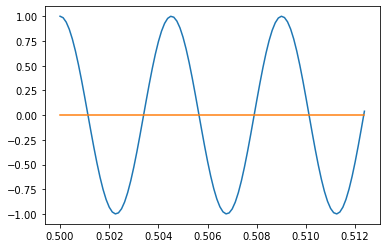

In [3]:
plt.plot(t[4000:4100], y[4000:4100])
plt.plot(t[4000:4100], 0*y[4000:4100])

If we zoom in later on a chunk of audio that's the same length, we see that there are 16 zero crossings, indicating that the frequency has gone up

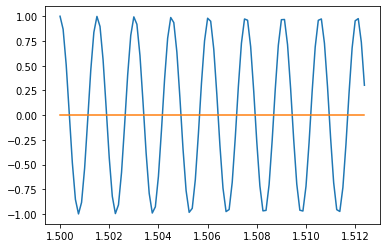

In [4]:
plt.plot(t[12000:12100], y[12000:12100])
plt.plot(t[12000:12100], 0*y[12000:12100])

If we zoom in even later, we see even more zero crossings

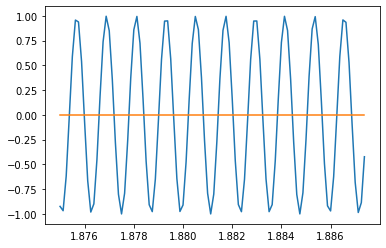

In [5]:
plt.plot(t[15000:15100], y[15000:15100])
plt.plot(t[15000:15100], 0*y[15000:15100])

## Exercise 1

Come up with some code to create a new array that counts the number of zero crossings in an interval around each sample in audio.  For example, in the above picture, we looked at windows with 100 samples in them.  


## Exercise 1b No Loops Challenge

As an added challenge, you should do this *without using any loops*!  As a hint for this, recall the following feature from the fundamental theorem of calculus:

### $ \int_{a}^b f(t) dt = \int_{0}^b f(t) dt - \int_{0}^a f(t) dt $

A similar statement exists for sums of arrays, which is aking to an integral in the discrete world.  That is, the sum of elements in an array from index i to index j is the difference between sum of the elements from 0 to j and the sum of the elements from 0 to i.  To do this for every sample, you can use *cumulative sums* with the <code>np.cumsum</code> method, as you did in the last module.  


To get you started, here's some code that creates an array that has a 1 if there's a zero crossing and a 0 otherwise


In [6]:
zcs = np.abs(np.sign(y[1::]) - np.sign(y[0:-1]))/2

That is, if there is a difference in sign of two adjacent samples, then we can say a zero crossing just occurred.  Let's test this out on the chirp example above

<StemContainer object of 3 artists>

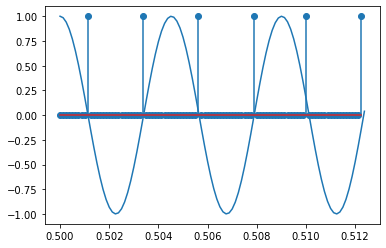

In [7]:
tinterval = t[4000:4100]
yinterval = y[4000:4100]
zcs = np.abs(np.sign(yinterval[1::]) - np.sign(yinterval[0:-1]))/2
plt.plot(tinterval, yinterval)
plt.stem(tinterval[0:-1], zcs)

Now see if you can make an array that counts the number of zero crossings in a "sliding window" of size 100 around each sample.  So for the above window, there should be a count of 6 at a time of 0.506.  Plot this array and make sure it's increasing linearly over time

## Exercise 2
One interesting property of human speech is that consonants are higher frequency than vowels.  So we can use zero crossings as a simple "filter" for what's a consonant and what's a vowel.  A sound file has been provided below of a countdown.  First, plot the zero crossings and see if you can match them with the vowels and consonants.  Then, create a new audio clip that contains only the consonants, and where the vowels are zeroed out, and vice versa.  There's a nifty way to do this in numpy with boolean conditions.  Something like

<code>y[zcs < threshold] = 0</code>
    
but you'll have to get your array indices to match up right

In [8]:
y, sr = librosa.load("malecountdown.mp3", sr=44100)
ipd.Audio(y, rate=sr)

/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
